#### Imports

In [23]:
using Plots
using Random

# Motion Planning Using Convex Optimization

## Model

In [24]:
struct Point
    x::Float64
    y::Float64
end

In [25]:
struct Pose
    position::Point
    orientation::Float64
end

## Random Map Generation

### Random Convex Polygon Generation

In [26]:
function GenerateRandomConvexPolygon(numberOfVertices::Int64)
    # Still remains a test for convexity and 
    #keep up with the computation until a convex poligon is found
    
    xCoordinateRandomPoints = []
    yCoordinateRandomPoints = []

    #Generate two lists of random X and Y coordinates
    
    for i in 1:numberOfVertices
        append!(xCoordinateRandomPoints, rand())
        append!(yCoordinateRandomPoints, rand())
        println("X gerado: ", xCoordinateRandomPoints[i],", Y gerado: ", yCoordinateRandomPoints[i],)
    end

    println("\n\n")

    #Sort them

    sort!(xCoordinateRandomPoints)
    sort!(yCoordinateRandomPoints)
    println("ordenando...")

    for i in 1:numberOfVertices
        println("X: ", xCoordinateRandomPoints[i],", Y: ", yCoordinateRandomPoints[i],)
    end

    #Isolate the extreme points
    minimumX = xCoordinateRandomPoints[1]
    maximumX = xCoordinateRandomPoints[numberOfVertices]
    minimumY = yCoordinateRandomPoints[1]
    maximumY = yCoordinateRandomPoints[numberOfVertices]


    xVectors = []
    yVectors = []

    lastTop = minimumX
    lastBot = minimumX;

    println("separando em duas correntes...")
    for i in 2:numberOfVertices-1
        x = xCoordinateRandomPoints[i];

        if rand(Bool) #Randomly divide the interior points into two chains
            append!(xVectors, x - lastTop) #Extract the vector components
            lastTop = x;
        else 
            append!(xVectors, lastBot - x)
            lastBot = x;
        end
        println("xVectors[", i-1, "] = ", xVectors[i-1])
    end

    append!(xVectors, maximumX - lastTop)
    append!(xVectors, lastBot - maximumX)

    lastLeft = minimumY
    lastRight = minimumY;

    for i in 2:numberOfVertices-1
        y = yCoordinateRandomPoints[i];

        if rand(Bool)
            append!(yVectors, y - lastLeft)
            lastLeft = y;
        else 
            append!(yVectors, lastRight - y)
            lastRight = y;
        end
    end

    append!(yVectors, maximumY - lastLeft)
    append!(yVectors, lastRight - maximumY)

    #Randomly pair up the X- and Y-components
    #Combine the paired up components into vectors
    shuffle(yVectors);

    points = []
    angles = []
    ang_aux = 0
    for i in 1:numberOfVertices
        push!(points, Point(xVectors[i],yVectors[i]))
        println("Ponto ", i, ": x = ", points[i].x, ", e y = ", points[i].y)
        ang_aux = 180*atan(yVectors[i],xVectors[i])/pi
        println("Ângulo cru = ", ang_aux)
        if (xVectors[i] >=0 && yVectors[i] >= 0) #top right
            ang_aux = 180 - ang_aux
        elseif (xVectors[i] >=0 && yVectors[i] < 0) #bot right
            ang_aux = abs(ang_aux) + 180
        elseif (xVectors[i] < 0 && yVectors[i] >= 0) #top left
            ang_aux = 180 - ang_aux
        elseif (xVectors[i] < 0 && yVectors[i] < 0) #bot left
            ang_aux = abs(ang_aux) + 180
        end
        append!(angles, ang_aux)
        println("Com ângulo = ", angles[i], "\n\n")
    end

    #Sort the vectors by angle
    order = sortperm(angles)
    points = points[order]

    for p in points
        println(p.x,", ",p.y)
    end

    x = 0.0
    y = 0.0
    minPolygonX = 0;
    minPolygonY = 0;
    newPoints = []
    println("gerando pontos:")
    for i in 1:numberOfVertices 
        push!(newPoints, Point(x,y))
        println("x = ", newPoints[i].x, ", y = ", newPoints[i].y)
        x += points[i].x;
        y += points[i].y;
        minPolygonX = min(minPolygonX, x)
        minPolygonY = min(minPolygonY, y)
    end
    
    println("\nshift:")
    xShift = minimumX - minPolygonX;
    yShift = minimumY - minPolygonY;
    println("XShift = ", xShift, ", YShift", yShift)

    println("pontos deslocados:")
    for i in 1:numberOfVertices 
        p = newPoints[i]
        points[i] = Point(p.x + xShift, p.y + yShift)
        println("x = ", points[i].x, ", y = ", points[i].y)
    end
    
    return points;
end

GenerateRandomConvexPolygon (generic function with 1 method)

X gerado: 0.829160192133316, Y gerado: 0.6378062462108902
X gerado: 0.149849027382702, Y gerado: 0.7361502372857248
X gerado: 0.8637722584916379, Y gerado: 0.25006965034108064
X gerado: 0.6958613794694011, Y gerado: 0.509478531666358
X gerado: 0.22162051042104103, Y gerado: 0.2645375395321182
X gerado: 0.7598808595996567, Y gerado: 0.8885742452642899



ordenando...
X: 0.149849027382702, Y: 0.25006965034108064
X: 0.22162051042104103, Y: 0.2645375395321182
X: 0.6958613794694011, Y: 0.509478531666358
X: 0.7598808595996567, Y: 0.6378062462108902
X: 0.829160192133316, Y: 0.7361502372857248
X: 0.8637722584916379, Y: 0.8885742452642899
separando em duas correntes...
xVectors[1] = 0.07177148303833902
xVectors[2] = -0.5460123520866991
xVectors[3] = -0.0640194801302556
xVectors[4] = -0.06927933253365937
Ponto 1: x = 0.07177148303833902, e y = -0.014467889191037586
Ângulo cru = -11.397100026197544
Com ângulo = 191.39710002619753


Ponto 2: x = -0.5460123520866991, e y = 0.2594088813252774
Ângulo

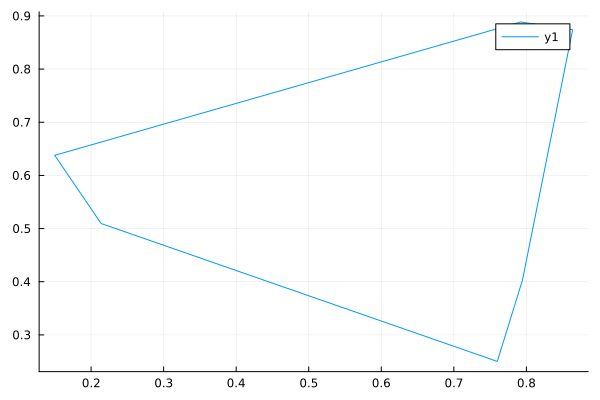

In [27]:
n_vertice = 6
a = GenerateRandomConvexPolygon(n_vertice)
xs = []
ys = []
for i in 1:n_vertice
    append!(xs,a[i].x)
    append!(ys,a[i].y)
end

append!(xs,a[1].x)
append!(ys,a[1].y)

plot(xs,ys)

### Convex Test for Polygons

In [28]:
function isConvex(points)
    convex = true
    i = 1
    m_min = 0
    m_max = 0
    prev = 0
    next = 0
    points_aux = []
    k = 1
    while (i <= length(points)) && convex
        prev = (length(points)+i-2)%(length(points))+1
        next = (i)%(length(points))+1

        println("\nPonto atual: ", i, ", Ponto anterior: ", prev, " Ponto seguinte: ", next)

        x_prev = points[prev].x
        x_now = points[i].x
        x_next = points[next].x
        y_prev = points[prev].y
        y_now = points[i].y
        y_next = points[next].y

        println("\nPonto atual: x = ", x_now, ", y = ", y_now, "\n")

        for j in 1:length(points)
            if (j != prev) && (j != next) && (j != i)
                println("O ponto = ", j, " será analisado!")
                push!(points_aux, points[j])
                k += 1
            end
        end
        
        println("\n")

        ang1 = 180*atan((y_prev - y_now)/(x_prev - x_now))/pi
        ang2 = 180*atan((y_next - y_now)/(x_next - x_now))/pi
        
        if (x_prev < x_now)
            ang1 = 180 + ang1
        end
        if (x_next < x_now)
            ang2 = 180 + ang2
        end

        if ang1<ang2 
            ang_min = ang1
            ang_max = ang2
        else
            ang_max = ang1
            ang_min = ang2
        end

        if (signbit(ang_min) != 1 && signbit(ang_max) != 1 && abs(ang_min-ang_max) > 180)
            ang_max = ang_max-360
            ang_aux = ang_min
            ang_min = ang_max
            ang_max = ang_aux
        elseif (signbit(ang_min) && abs(ang_min-ang_max) > 180)
            ang_min = 360 + ang_min
            ang_aux = ang_max
            ang_max = ang_min
            ang_min = ang_aux
        end

            

        println("Ang_min = ", ang_min)
        println("Ang_max = ", ang_max)

        for p in points_aux
            println("\nPonto ", i, ", em relação ao Ponto x = ", p.x, ", y = ", p.y)
            ang = 180*atan((p.y - y_now)/(p.x - x_now))/pi
            if (p.x < x_now)
                ang = 180 + ang
            end
            if (ang < ang_min) || (ang > ang_max)
                if signbit(ang)
                    ang = 360+ang
                    if (ang < ang_min) || (ang > ang_max)
                        convex = false
                        println("Não é convexo, pois ang = ", ang)
                        break
                    end
                else
                    ang = ang-360
                    if (ang < ang_min) || (ang > ang_max)
                        convex = false
                        println("Não é convexo, pois ang = ", ang)
                        break
                    end
                end
            end
            println("Sem problemas de convexidade, pois ang = ", ang)
        end

        points_aux = []

        i += 1
    end   
    return convex
end

isConvex (generic function with 1 method)

In [29]:

isConvex(a)


Ponto atual: 1, Ponto anterior: 6 Ponto seguinte: 2

Ponto atual: x = 0.7598808595996567, y = 0.25006965034108064

O ponto = 3 será analisado!
O ponto = 4 será analisado!
O ponto = 5 será analisado!


Ang_min = 77.20636936850151
Ang_max = 154.58774312838705

Ponto 1, em relação ao Ponto x = 0.149849027382702, y = 0.6378062462108902
Sem problemas de convexidade, pois ang = 147.55993611805135

Ponto 1, em relação ao Ponto x = 0.7920007754532988, y = 0.8885742452642899
Sem problemas de convexidade, pois ang = 87.12016857893637

Ponto 1, em relação ao Ponto x = 0.8637722584916379, y = 0.8741063560732523
Sem problemas de convexidade, pois ang = 80.54792629766095

Ponto atual: 2, Ponto anterior: 1 Ponto seguinte: 3

Ponto atual: x = 0.2138685075129576, y = 0.509478531666358

O ponto = 4 será analisado!
O ponto = 5 será analisado!
O ponto = 6 será analisado!


Ang_min = -25.412256871612957
Ang_max = 116.51345874859811

Ponto 2, em relação ao Ponto x = 0.7920007754532988, y = 0.88857424526428

true